# Domain: Semiconductor manufacturing

## Data understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 


In [2]:
df = pd.read_csv('signal-data.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

In [4]:
df.shape

(1567, 592)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,1561.000000,1561.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.000000,549.000000,549.000000,549.000000,852.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.000000,1558.00000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1559.000000,1559.000000,1559.000000,1562.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0

In [6]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
13           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
30           float64
31           float64
32           float64
33           float64
34           float64
35           float64
36           float64
37           float64
38           float64
39           float64
40           float64
41           float64
42           float64
43           float64
44           float64
45           float64
46           

In [7]:
df.isnull().sum() > (0.20*1567)

Time         False
0            False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
32           False
33           False
34           False
35           False
36           False
37           False
38           False
39           False
40           False
41           False
42           False
43           False
44           False
45           False
46           False
47           False
48           False
49           False
50           False
51          

### Data cleaning

In [8]:
df1 = df.drop(['Time','72','73','85','109','110','111','112','157','158','220','244','245', '246', '247', '292','293','345','346','358','382','383','384','385','492','516','517','518','519','578','579', '580', '581'], axis=1)

In [9]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0.0,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,0.0,1.5123,3.5811,0.1337,0.0055,3.8447,0.1077,0.0167,418.1363,

In [10]:
df1.isnull().sum() < (0.20*1567)

0            True
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
32           True
33           True
34           True
35           True
36           True
37           True
38           True
39           True
40           True
41           True
42           True
43           True
44           True
45           True
46           True
47           True
48           True
49           True
50           True
51           True
52           True
53           True
54           True
55        

In [11]:
meanFiller = lambda x: x.fillna(x.mean())
df1 = df1.apply(meanFiller,axis=0)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.2300,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0.0,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,0.0,1.5123,3.5811,0.1337,0.0055,3.8447,0.1077,0.0167,418.1363

In [12]:
df1.columns = 'feature: ' + df1.columns
df1.head()

,feature: 0,feature: 1,feature: 2,feature: 3,feature: 4,feature: 5,feature: 6,feature: 7,feature: 8,feature: 9,feature: 10,feature: 11,feature: 12,feature: 13,feature: 14,feature: 15,feature: 16,feature: 17,feature: 18,feature: 19,feature: 20,feature: 21,feature: 22,feature: 23,feature: 24,feature: 25,feature: 26,feature: 27,feature: 28,feature: 29,feature: 30,feature: 31,feature: 32,feature: 33,feature: 34,feature: 35,feature: 36,feature: 37,feature: 38,feature: 39,feature: 40,feature: 41,feature: 42,feature: 43,feature: 44,feature: 45,feature: 46,feature: 47,feature: 48,feature: 49,feature: 50,feature: 51,feature: 52,feature: 53,feature: 54,feature: 55,feature: 56,feature: 57,feature: 58,feature: 59,feature: 60,feature: 61,feature: 62,feature: 63,feature: 64,feature: 65,feature: 66,feature: 67,feature: 68,feature: 69,feature: 70,feature: 71,feature: 74,feature: 75,feature: 76,feature: 77,feature: 78,feature: 79,feature: 80,feature: 81,feature: 82,feature: 83,feature: 84,feature: 86,feature: 87,feature: 88,feature: 89,feature: 90,feature: 91,feature: 92,feature: 93,feature: 94,feature: 95,feature: 96,feature: 97,feature: 98,feature: 99,feature: 100,feature: 101,feature: 102,feature: 103,feature: 104,feature: 105,feature: 106,feature: 107,feature: 108,feature: 113,feature: 114,feature: 115,feature: 116,feature: 117,feature: 118,feature: 119,feature: 120,feature: 121,feature: 122,feature: 123,feature: 124,feature: 125,feature: 126,feature: 127,feature: 128,feature: 129,feature: 130,feature: 131,feature: 132,feature: 133,feature: 134,feature: 135,feature: 136,feature: 137,feature: 138,feature: 139,feature: 140,feature: 141,feature: 142,feature: 143,feature: 144,feature: 145,feature: 146,feature: 147,feature: 148,feature: 149,feature: 150,feature: 151,feature: 152,feature: 153,feature: 154,feature: 155,feature: 156,feature: 159,feature: 160,feature: 161,feature: 162,feature: 163,feature: 164,feature: 165,feature: 166,feature: 167,feature: 168,feature: 169,feature: 170,feature: 171,feature: 172,feature: 173,feature: 174,feature: 175,feature: 176,feature: 177,feature: 178,feature: 179,feature: 180,feature: 181,feature: 182,feature: 183,feature: 184,feature: 185,feature: 186,feature: 187,feature: 188,feature: 189,feature: 190,feature: 191,feature: 192,feature: 193,feature: 194,feature: 195,feature: 196,feature: 197,feature: 198,feature: 199,feature: 200,feature: 201,feature: 202,feature: 203,feature: 204,feature: 205,feature: 206,feature: 207,feature: 208,feature: 209,feature: 210,feature: 211,feature: 212,feature: 213,feature: 214,feature: 215,feature: 216,feature: 217,feature: 218,feature: 219,feature: 221,feature: 222,feature: 223,feature: 224,feature: 225,feature: 226,feature: 227,feature: 228,feature: 229,feature: 230,feature: 231,feature: 232,feature: 233,feature: 234,feature: 235,feature: 236,feature: 237,feature: 238,feature: 239,feature: 240,feature: 241,feature: 242,feature: 243,feature: 248,feature: 249,feature: 250,feature: 251,feature: 252,feature: 253,feature: 254,feature: 255,feature: 256,feature: 257,feature: 258,feature: 259,feature: 260,feature: 261,feature: 262,feature: 263,feature: 264,feature: 265,feature: 266,feature: 267,feature: 268,feature: 269,feature: 270,feature: 271,feature: 272,feature: 273,feature: 274,feature: 275,feature: 276,feature: 277,feature: 278,feature: 279,feature: 280,feature: 281,feature: 282,feature: 283,feature: 284,feature: 285,feature: 286,feature: 287,feature: 288,feature: 289,feature: 290,feature: 291,feature: 294,feature: 295,feature: 296,feature: 297,feature: 298,feature: 299,feature: 300,feature: 301,feature: 302,feature: 303,feature: 304,feature: 305,feature: 306,feature: 307,feature: 308,feature: 309,feature: 310,feature: 311,feature: 312,feature: 313,feature: 314,feature: 315,feature: 316,feature: 317,feature: 318,feature: 319,feature: 320,feature: 321,feature: 322,feature: 323,feature: 324,feature: 325,feature: 326,feature: 327,feature: 328,feature: 329,feature: 330,feature: 33

In [13]:
df1.isnull().sum()

feature: 0            0
feature: 1            0
feature: 2            0
feature: 3            0
feature: 4            0
feature: 5            0
feature: 6            0
feature: 7            0
feature: 8            0
feature: 9            0
feature: 10           0
feature: 11           0
feature: 12           0
feature: 13           0
feature: 14           0
feature: 15           0
feature: 16           0
feature: 17           0
feature: 18           0
feature: 19           0
feature: 20           0
feature: 21           0
feature: 22           0
feature: 23           0
feature: 24           0
feature: 25           0
feature: 26           0
feature: 27           0
feature: 28           0
feature: 29           0
feature: 30           0
feature: 31           0
feature: 32           0
feature: 33           0
feature: 34           0
feature: 35           0
feature: 36           0
feature: 37           0
feature: 38           0
feature: 39           0
feature: 40           0
feature: 41     

In [14]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature: 0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.840000,3056.540000,3356.3500
feature: 1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.910000,2538.745000,2846.4400
feature: 2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.955600,2218.055500,2315.2667
feature: 3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.353800,1590.169900,3715.0417
feature: 4,1567.0,4.197013,56.103066,0.6815,1.01770,1.317100,1.529600,1114.5366
feature: 5,1567.0,100.000000,0.000000,100.0000,100.00000,100.000000,100.000000,100.0000
feature: 6,1567.0,101.112908,6.209271,82.1311,97.93780,101.492200,104.530000,129.2522
feature: 7,1567.0,0.121822,0.008936,0.0000,0.12110,0.122400,0.123800,0.1286
feature: 8,1567.0,1.462862,0.073849,1.1910,1.41125,1.461600,1.516850,1.6564
feature: 9,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.001300,0.008400,0.0749


In [15]:
df2 = df1.drop(['feature: 5', 'feature: 42'],  axis=1)
df2.head(10)
df2.shape

(1567, 557)

In [16]:
df3 = df2.drop(['feature: 13','feature: 49','feature: 52','feature: 69','feature: 97','feature: 141',
             'feature: 149','feature: 178','feature: 179','feature: 186','feature: 189','feature: 190','feature: 191','feature: 192',
             'feature: 193','feature: 194','feature: 226','feature: 229','feature: 230','feature: 231','feature: 232','feature: 233',
             'feature: 234','feature: 235','feature: 236','feature: 237','feature: 240','feature: 241','feature: 242','feature: 243',
             'feature: 256','feature: 257','feature: 258','feature: 259','feature: 260','feature: 261','feature: 262','feature: 263',
             'feature: 264','feature: 265','feature: 266','feature: 276','feature: 284','feature: 313','feature: 314','feature: 315',
             'feature: 322','feature: 325','feature: 326','feature: 327','feature: 328','feature: 329','feature: 330','feature: 364',
             'feature: 369','feature: 370','feature: 371','feature: 372','feature: 373','feature: 374','feature: 375','feature: 378',
             'feature: 379','feature: 380','feature: 381','feature: 394','feature: 395','feature: 396','feature: 397','feature: 398',
             'feature: 399','feature: 400','feature: 401','feature: 402','feature: 403','feature: 404','feature: 414','feature: 422',
             'feature: 449','feature: 450','feature: 451','feature: 458','feature: 461','feature: 462','feature: 463','feature: 464',
             'feature: 465','feature: 466','feature: 481','feature: 498','feature: 501','feature: 502','feature: 503','feature: 504',
             'feature: 505','feature: 506','feature: 507','feature: 508','feature: 509','feature: 512','feature: 513','feature: 514',
             'feature: 515','feature: 528','feature: 529','feature: 530','feature: 531','feature: 532','feature: 533','feature: 534',
             'feature: 535','feature: 536','feature: 537','feature: 538'],axis=1)

In [17]:
df3.shape

(1567, 443)

### Removing multicollinear variables

In [18]:
def remove_collinear_features(x, threshold):
    cor_matrix = x.corr()
    iters = range(len(cor_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i+1):
            item = cor_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            
            if val >= threshold:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    return x

In [19]:
df3 = remove_collinear_features(df3,0.70)

feature: 17 | feature: 11 | 0.79
feature: 22 | feature: 21 | 0.73
feature: 26 | feature: 25 | 0.82
feature: 27 | feature: 25 | 0.98
feature: 27 | feature: 26 | 0.79
feature: 30 | feature: 29 | 0.86
feature: 34 | feature: 32 | 0.75
feature: 35 | feature: 34 | 0.77
feature: 36 | feature: 32 | 0.75
feature: 36 | feature: 34 | 1.0
feature: 36 | feature: 35 | 0.77
feature: 39 | feature: 34 | 0.8
feature: 39 | feature: 36 | 0.8
feature: 46 | feature: 45 | 0.81
feature: 50 | feature: 46 | 0.9
feature: 51 | feature: 47 | 0.71
feature: 54 | feature: 53 | 0.94
feature: 60 | feature: 43 | 0.9
feature: 60 | feature: 50 | 0.7
feature: 65 | feature: 64 | 0.84
feature: 66 | feature: 46 | 0.82
feature: 66 | feature: 50 | 0.76
feature: 70 | feature: 46 | 0.8
feature: 70 | feature: 50 | 0.77
feature: 70 | feature: 62 | 0.73
feature: 70 | feature: 66 | 0.9
feature: 96 | feature: 94 | 0.96
feature: 98 | feature: 94 | 0.84
feature: 98 | feature: 96 | 0.87
feature: 101 | feature: 94 | 0.73
feature: 101 | fe

feature: 335 | feature: 196 | 0.93
feature: 335 | feature: 197 | 0.86
feature: 335 | feature: 199 | 0.96
feature: 335 | feature: 203 | 0.72
feature: 335 | feature: 204 | 0.79
feature: 335 | feature: 205 | 0.85
feature: 335 | feature: 207 | 0.9
feature: 335 | feature: 332 | 0.96
feature: 335 | feature: 333 | 0.86
feature: 335 | feature: 334 | 0.74
feature: 336 | feature: 67 | 0.87
feature: 336 | feature: 196 | 0.91
feature: 336 | feature: 197 | 0.9
feature: 336 | feature: 198 | 0.7
feature: 336 | feature: 199 | 0.88
feature: 336 | feature: 203 | 0.71
feature: 336 | feature: 204 | 0.82
feature: 336 | feature: 205 | 0.88
feature: 336 | feature: 207 | 0.9
feature: 336 | feature: 332 | 0.94
feature: 336 | feature: 333 | 0.9
feature: 336 | feature: 334 | 0.76
feature: 336 | feature: 335 | 0.93
feature: 337 | feature: 201 | 0.93
feature: 337 | feature: 202 | 0.81
feature: 338 | feature: 74 | 0.87
feature: 338 | feature: 201 | 0.75
feature: 338 | feature: 202 | 0.99
feature: 338 | feature: 203

feature: 437 | feature: 301 | 0.95
feature: 439 | feature: 168 | 0.79
feature: 439 | feature: 303 | 0.77
feature: 440 | feature: 27 | 0.71
feature: 440 | feature: 169 | 1.0
feature: 440 | feature: 304 | 0.98
feature: 441 | feature: 170 | 0.99
feature: 441 | feature: 305 | 0.95
feature: 442 | feature: 171 | 0.97
feature: 442 | feature: 306 | 0.96
feature: 443 | feature: 172 | 1.0
feature: 443 | feature: 174 | 1.0
feature: 443 | feature: 307 | 0.96
feature: 443 | feature: 309 | 0.96
feature: 444 | feature: 173 | 0.99
feature: 444 | feature: 308 | 0.95
feature: 445 | feature: 172 | 1.0
feature: 445 | feature: 174 | 1.0
feature: 445 | feature: 307 | 0.96
feature: 445 | feature: 309 | 0.96
feature: 445 | feature: 443 | 0.99
feature: 446 | feature: 175 | 1.0
feature: 446 | feature: 310 | 0.95
feature: 447 | feature: 176 | 1.0
feature: 447 | feature: 311 | 0.98
feature: 448 | feature: 177 | 1.0
feature: 448 | feature: 312 | 1.0
feature: 452 | feature: 180 | 0.99
feature: 452 | feature: 316 | 

feature: 584 | feature: 583 | 0.99
feature: 585 | feature: 583 | 1.0
feature: 585 | feature: 584 | 1.0
feature: 588 | feature: 587 | 0.97


In [20]:
df3.shape

(1567, 202)

In [21]:
threshold = 0.2
df4 = df3.drop(df3.std()[df3.std() < threshold].index.values, axis=1)

In [22]:
df4.shape

(1567, 112)

In [23]:
df4['feature: Pass/Fail'].value_counts()

-1    1463
 1     104
Name: feature: Pass/Fail, dtype: int64

### Data visualization

In [24]:
def histograms(y, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        y[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout() 
    plt.show()

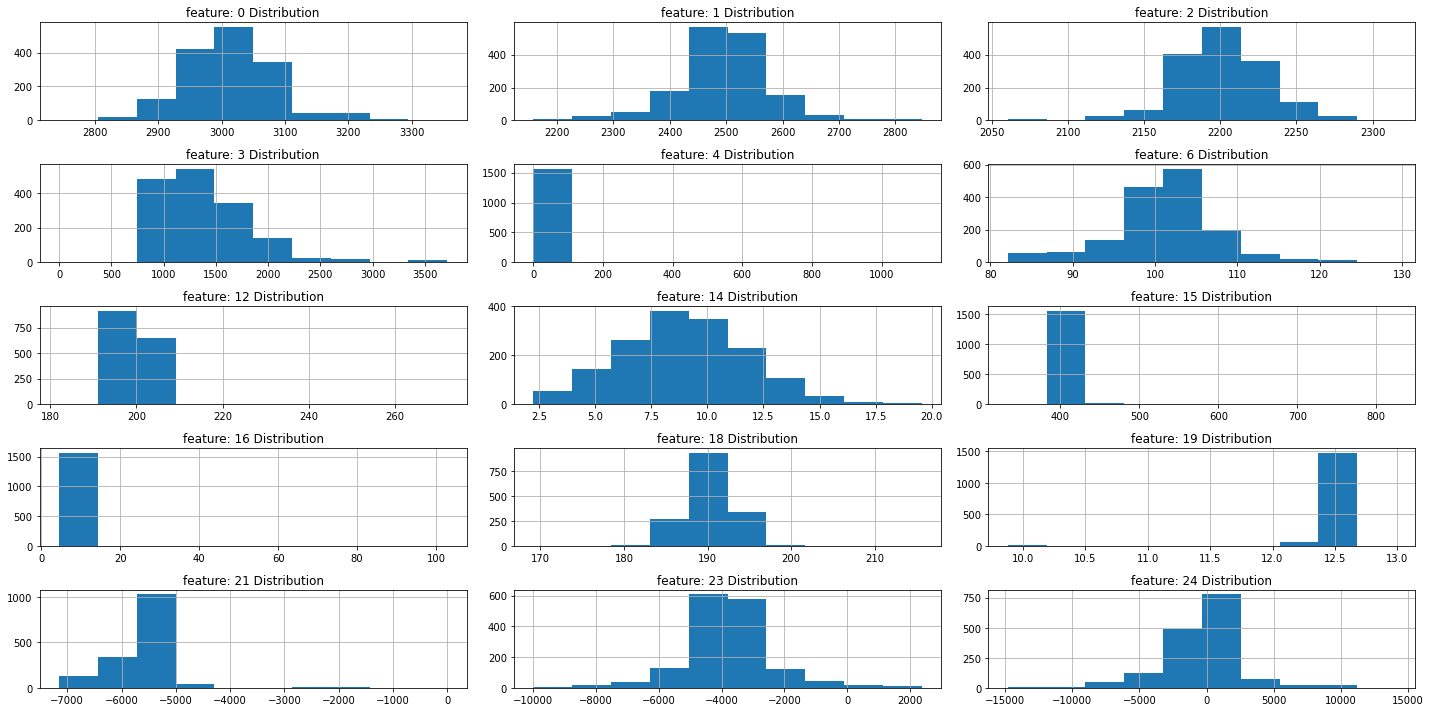

In [25]:
histograms(df4, df4.iloc[:,0:15], 5, 3)

In [26]:
x = df4.iloc[:,:111]
y = df4['feature: Pass/Fail']

In [27]:
x.head()

,feature: 0,feature: 1,feature: 2,feature: 3,feature: 4,feature: 6,feature: 12,feature: 14,feature: 15,feature: 16,feature: 18,feature: 19,feature: 21,feature: 23,feature: 24,feature: 28,feature: 29,feature: 31,feature: 32,feature: 33,feature: 37,feature: 38,feature: 40,feature: 41,feature: 43,feature: 45,feature: 48,feature: 55,feature: 59,feature: 61,feature: 62,feature: 63,feature: 64,feature: 67,feature: 68,feature: 71,feature: 83,feature: 88,feature: 90,feature: 115,feature: 117,feature: 122,feature: 126,feature: 128,feature: 129,feature: 133,feature: 134,feature: 135,feature: 136,feature: 137,feature: 138,feature: 139,feature: 142,feature: 150,feature: 151,feature: 159,feature: 160,feature: 161,feature: 162,feature: 166,feature: 167,feature: 177,feature: 180,feature: 181,feature: 182,feature: 183,feature: 188,feature: 195,feature: 200,feature: 201,feature: 208,feature: 218,feature: 223,feature: 225,feature: 250,feature: 268,feature: 269,feature: 418,feature: 419,feature: 423,feature: 432,feature: 433,feature: 438,feature: 460,feature: 468,feature: 472,feature: 476,feature: 482,feature: 483,feature: 484,feature: 485,feature: 486,feature: 487,feature: 488,feature: 489,feature: 499,feature: 500,feature: 510,feature: 511,feature: 521,feature: 546,feature: 547,feature: 548,feature: 550,feature: 559,feature: 562,feature: 564,feature: 570,feature: 571,feature: 572,feature: 589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,192.3963,12.5190,-5419.00,-4043.75,751.00,64.2333,2.0222,3.5191,83.3971,9.5126,66.3141,86.9555,61.29,4.515,352.7173,130.3691,141.2282,2834.0,-1.7264,10.6231,108.6427,16.1445,21.7264,0.9226,148.6009,84.0793,7.2163,1747.6049,8671.9301,748.6115,58.4306,2.639,3.353,3.188,-0.0473,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,6.78,4.271,10.284,1017.0,967.0,1066.0,368.0,2.0,0.9,0.160,20.95,0.333,12.49,16.713,65.363,0.292,10.30,5.38,97.314,3.4789,175.2173,1940.3994,219.9453,40.855,4.5152,525.0965,0.0000,53.6840,26.3617,49.0013,44.5055,29.9394,311.6377,63.7987,31.9893,613.3069,291.4842,494.6996,178.1759,843.1138,0.0000,53.1098,0.0000,0.0000,0.0000,64.6707,0.0000,0.0,1.0616,395.570,75.752,12.93,0.4385,262.729683,6.444985,533.8500,2.1113,8.95,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,191.2872,12.4608,-5441.50,-3498.75,-1640.25,68.4222,2.2667,3.4171,84.9052,9.7997,64.9193,87.5241,78.25,2.773,352.2445,133.1727,145.8445,2853.0,0.8073,10.3092,113.9800,10.9036,19.1927,1.1598,154.3709,82.3494,6.8043,1931.6464,8407.0299,731.2517,58.6680,2.541,2.771,3.272,-0.0946,998.1081,37.9213,98.0,80.3,81.0,56.2000,219.7679,5.70,6.285,13.077,568.0,59.0,297.0,3277.0,2.2,1.1,0.325,17.99,0.439,10.14,16.358,82.986,0.222,8.02,3.74,134.250,3.9578,128.4285,1988.0000,193.0287,29.743,3.6327,0.0000,368.9713,61.8918,8.4887,199.7866,48.5294,40.4475,463.2883,73.5536,30.8643,0.0000,246.7762,0.0000,359.0444,130.6350,820.7900,194.4371,0.0000,0.0000,0.0000,141.4365,0.0000,0.0,1.3526,408.798,74.640,16.00,0.1745,262.729683,6.444985,535.0164,2.4335,5.92,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,192.7035,12.5404,-5447.75,-4047.00,-1916.50,67.1333,2.3333,3.5986,84.7569,8.6590,65.8389,84.7327,14.37,5.434,364.3782,131.8027,141.0845,2936.0,23.8245,10.1685,115.6273,11.3019,16.1755,0.8694,145.8000,84.7681,7.1041,1685.8514,9317.1698,718.5777,58.4808,2.882,3.094,3.272,-0.1892,998.4440,42.0579,89.0,126.4,96.5,45.1001,306.0380,8.33,4.819,8.443,562.0,788.0,759.0,2100.0,2.1,1.4,0.326,17.78,0.745,13.31,22.912,60.110,0.139,16.73,5.09,79.618,2.4266,182.4956,839.6006,104.4042,29.621,3.9133,0.0000,0.0000,50.6425,18.7546,109.5747,60.0000,32.3594,21.3645,148.0287,13.3923,434.2674,151.7665,0.0000,190.3869,746.9150,74.0741,191.7582,250.1742,0.0000,0.0000,240.7767,244.2748,0.0,0.7942,411.136,74.654,16.16,0.3718,267.064000,1.100000,535.0245,2.0293,11.21,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,4

In [28]:
x.shape

(1567, 111)

In [29]:
y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: feature: Pass/Fail, dtype: int64

In [30]:
y.shape

(1567,)

## Data balancing using SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '-1': {}".format(sum(y==-1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
x_new, y_new = sm.fit_resample(x, y.ravel())


print("After UpSampling, counts of label '-1': {}".format(sum(y_new==-1)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_new==1)))



print('After UpSampling, the shape of X: {}'.format(x_new.shape))
print('After UpSampling, the shape of y: {} \n'.format(y_new.shape))

Before UpSampling, counts of label '-1': 1463
Before UpSampling, counts of label '1': 104 

After UpSampling, counts of label '-1': 1463
After UpSampling, counts of label '1': 1463 

After UpSampling, the shape of X: (2926, 111)
After UpSampling, the shape of y: (2926,) 



In [33]:
x_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature: 0,2926.0,3009.156323,71.785734,2743.2400,2962.272500,2998.465099,3048.579982,3356.3500
feature: 1,2926.0,2494.872388,72.139858,2158.7500,2454.320835,2498.306232,2534.306098,2846.4400
feature: 2,2926.0,2200.163310,26.774567,2060.6600,2182.145354,2199.140332,2216.477800,2315.2667
feature: 3,2926.0,1382.526090,371.738409,0.0000,1111.476400,1304.682400,1572.469800,3715.0417
feature: 4,2926.0,2.856937,41.076230,0.6815,1.091113,1.316800,1.500082,1114.5366
feature: 6,2926.0,101.206791,5.304397,82.1311,98.788113,101.367639,103.996020,129.2522
feature: 12,2926.0,199.935256,2.779907,182.0940,198.409464,199.748994,201.623990,272.0451
feature: 14,2926.0,8.699820,2.583044,2.2493,6.850425,8.666617,10.435000,19.5465
feature: 15,2926.0,413.167446,13.283047,333.4486,407.712524,412.723550,418.032992,824.9271
feature: 16,2926.0,9.903095,1.782588,4.4696,9.603650,9.870940,10.138671,102.8677


## Logistic regression model

In [35]:
x_new, y_new = make_classification(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
y_predict = pipe.predict(x_train)
print(" Pipeline steps:\ n{}". format( pipe.steps))

pipe.score(x_test, y_test)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())]


0.96

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        40

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



## K fold cross validation

In [37]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, x_new, y_new, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.9 1.  1.  1.  1.  0.9 1.  0.9 1.  1. ]
Accuracy: 97.000% (4.583%)


## PCA and Logistic Regression model

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = .30, random_state=0)
pipe2 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))]) 
pipe2.fit(x_train, y_train) 
print('Test Accuracy: %.3f' % pipe2.score(x_test, y_test))

Test Accuracy: 0.800


## PCA and SVC model

In [39]:
pipe_final = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 


param_grid = {'pca__n_components':[14,15],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_final , param_grid = param_grid, cv = 5) 

grid.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( x_test, y_test)))

 Best cross-validation accuracy: 0.91
 Best parameters:  {'pca__n_components': 15, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
 Test set accuracy: 1.00


From the above models, the one which is used with dimensionality reduction has best accuracy(PCA and SVC) with some hyperpara meter tuning